# Tsiky Tafita RAKOTOHERISOA - Data Driven Optimization

**Assignment 2**

# 1. Use the ScikitLearn machine learning library to implement i) Linear Regression ii) Ridge Regression, iii) Elastic Net

## Importing all the required librairies

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler

## Data preprocessing

Before building the three models, let us preprocess the dataset. It  allows models to discern and learn from important features, enhancing prediction accuracy and decision-making process.

 **- Reading the dataset**

In [2]:
# Reading the dataset using pandas 
data = pd.read_csv("/kaggle/input/lifeexpectancy/LifeExpectancyData.csv")

# display the first 5 rows
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


**- Shape of the dataset and type**

In [3]:
# Shape of the dataset
print(f"The shape of the dataset is {data.shape} \n \n")

# Type of the variables of the data
data.dtypes

The shape of the dataset is (2938, 22) 
 



Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

The dataset contains 2938 rows and 22 columns. All of the variables are numerical except from "Country" and "Status".

**- Drop the Country column**

I choose to drop the "Country" column because it contains too many unique categories. It has 193 unique values, so one-hot encoding may create a sparse dataset, leading to overfitting.

In [4]:
# Number of country in the dataset
print(f"The number of country in the dataset is: {data['Country'].nunique()}")

The number of country in the dataset is: 193


In [5]:
# Drop the Country column
data = data.drop('Country', axis=1)

**- Handling NaN values**

We replace the NaN values in the numerical variables by the mean.

In [6]:
# Replacing the NaN values in the numerical variables by the mean
data = data.fillna(data.drop(columns = ["Status"]).mean())

**- Encoding the categorical variable: we have only one categorical variable (Status).**

In [7]:
# Convert categorical variables
df = pd.get_dummies(data, columns=['Status'])

**- Define the features and the target. The target variable is "Life expectancy"**

In [8]:
# Features, explanatory variables
X = df.drop('Life expectancy ', axis=1)

# Target(Response) variable
y = df['Life expectancy ']

**- Data transformation: standardization. It adjusts data to have zero mean and unit variance.**

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## i) Linear regression 

I choose to use polynomial regression.

Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modelled as an nth-degree polynomial. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y.

The general form of a polynomial regression equation of degree $n$ is:

$$
y = \beta_0+ \beta_1 x+ \beta_2 x^2 + \cdots + \beta_n x^n + \epsilon 
$$

where,

   - y is the dependent variable.
    
   - x is the independent variable.
    
   - $ \beta_0, \beta_1, \beta_2, \cdots, \beta_n $ are the coefficients of the polynomial terms.
    
   - n is the degree of the polynomial.
    
   - $\epsilon$ represents the error term.

**- Train and evaluation of the model**

In [10]:
# Polynomial transformation (keep degree low to avoid overfitting)
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Linear regression model (helps with overfitting)
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 8.0121
R² Score: 0.9075


This high R² score suggests us that the polynomial model fits the data well.

**- Plot of the predicted value versus the actual value**

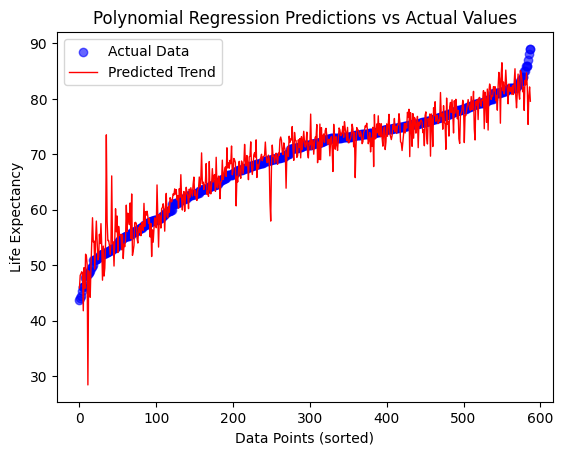

In [11]:
# Sort values for a smooth trendline
sorted_indices = np.argsort(y_test)  # Get indices that sort y_test
y_test_sorted = np.array(y_test)[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot actual vs. predicted
plt.scatter(range(len(y_test_sorted)), y_test_sorted, color='blue', label='Actual Data', alpha=0.6)
plt.plot(range(len(y_pred_sorted)), y_pred_sorted, color='red', linewidth=1, label='Predicted Trend')

# Labels and legend
plt.xlabel('Data Points (sorted)')
plt.ylabel('Life Expectancy')
plt.legend()
plt.title('Polynomial Regression Predictions vs Actual Values')
plt.show()

## ii) Ridge Regression

The Ridge regression is a linear regression technique that adds a regularization term to the standard linear objective. The goal is to prevent overfitting by penalizing large coefficient in linear regression equation.

The objecctive function is:
$$
f(w) = \|y - Aw\|^2 + \gamma\|w\|^{2}_{2}
$$
where
- the additional term $\gamma\|w\|^{2}_{2}$ is called a regularizer.
- $\gamma \geq 0$ is a regularization parameter.

**- Train and evaluation of the model**

In [12]:
# Create a Ridge Regression model
ridge_model = Ridge(alpha=0.5)  # alpha is the regularization strength

# Train the model on the training data
ridge_model.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred_ridge = ridge_model.predict(X_test_poly)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_ridge)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred_ridge)
print(f"R² Score:: {r2}")

Mean Squared Error: 7.4083768250608495
R² Score:: 0.9144877573026263


According to the value of $R^2$, the ridge regression model fit the data well too.

**- Visualization of the model**

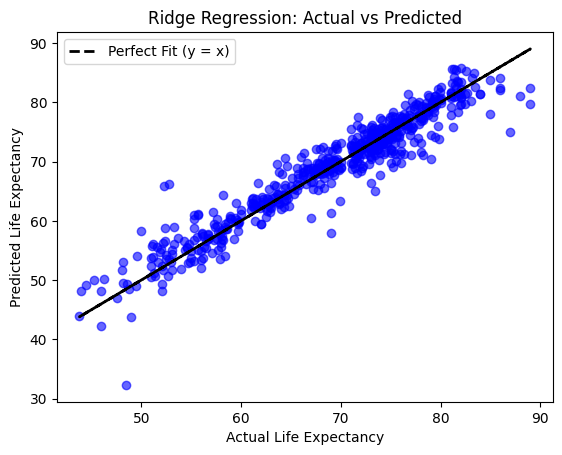

In [13]:
plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.6)
plt.plot(y_test, y_test, color='black', linestyle='dashed', linewidth=2, label='Perfect Fit (y = x)')

plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Ridge Regression: Actual vs Predicted")
plt.legend()
plt.show()


## iii) Elastic Net

Elastic Net Regression is a hybrid regularization technique that combines the power of both $L_1$ and $L_2$ regularization in linear regression objective.

$$
f(w) = \|y - Aw\|^2 + \gamma_2\|w\|^{2}_{2} + \gamma_1\|w\|_{1}
$$
where 
- $\gamma_1, \gamma_2 > 0$ are regularization parameters.
- the functions $\|w\|^{2}_{2}, \gamma_1\|w\|_{1}$ are regularization terms.

In [14]:
# Create an instance of the ElasticNet model
elastic_net = ElasticNet(alpha=0.3, l1_ratio=0.4)

# Fit the model to the training data
elastic_net.fit(X_train_poly, y_train)
print('Elastic Net model trained successfully.')

# Make predictions on the test data
y_pred_elasticnet = elastic_net.predict(X_test_poly)
print('Predictions made on the test data.')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_elasticnet)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred_elasticnet)
print(f"R² Score:: {r2}")

Elastic Net model trained successfully.
Predictions made on the test data.
Mean Squared Error: 9.818671153526743
R² Score:: 0.886666592362601


According to this $R^2$ value, comparing to the two first models, Elastic Net does not perform well.

**- Visualization of the model**

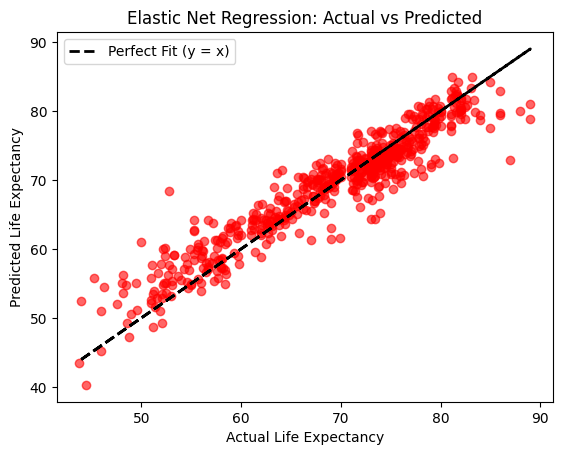

In [15]:
plt.scatter(y_test, y_pred_elasticnet, color='red', alpha=0.6)
plt.plot(y_test, y_test, color='black', linestyle='dashed', linewidth=2, label='Perfect Fit (y = x)')

plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Elastic Net Regression: Actual vs Predicted")
plt.legend()
plt.show()


**- Comparison of the performance of the model**

In [16]:
# Store model results in a dictionary
results = {
    "Model": ["Linear Regression", "Ridge Regression", "Elastic Net"],
    "MSE": [
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_pred_ridge),
        mean_squared_error(y_test, y_pred_elasticnet),
    ],
    "R² Score": [
        r2_score(y_test, y_pred),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_elasticnet),
    ]
}

# Convert results to a DataFrame for better visualization
import pandas as pd
results_df = pd.DataFrame(results)

# Print comparison table
print(results_df)


               Model       MSE  R² Score
0  Linear Regression  8.012065  0.907520
1   Ridge Regression  7.408377  0.914488
2        Elastic Net  9.818671  0.886667


**Conclusion:**

- Ridge Regression is the best choice since it has the lowest MSE and highest R² score, indicating better accuracy and generalization.

- Linear Regression is still a strong alternative, but it might be slightly overfitting compared to Ridge.

- Elastic Net may not be the best for this dataset—it likely over-regularized some features, reducing predictive power.

# 2. Deep Learning with CNN for clothing classification using Fashion-MNIST dataset. 

## Importing all required librairies

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.nn.init as init
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
from torch.utils.data import Dataset
from PIL import Image
import torchvision.utils as vutils

## 2.a) Use PyTorch to design a CNN model for clothing classification with suitable input dimension, convolutional layers, fully connected layers, and an output layer.

- Before designing a CNN model, let us preprocess our data. We need all of the dataset in the same format and size. Let us create a class that loads image data from a CSV file and prepares it for use in a neural network.

In [18]:
class CSVImageDataset(Dataset):
    def __init__(self, csv_file, img_size=(28, 28), transform=None, device="cuda"): # Constructor
        self.data = pd.read_csv(csv_file)  # Load CSV file
        self.img_size = img_size
        self.transform = transform
        self.device = torch.device(device if torch.cuda.is_available() else "cpu")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx].values  # take rows
        label = int(row[0])  # The first element is the label
        image = np.array(row[1:], dtype=np.float32).reshape(self.img_size)  # reshaped the flattened image in 2D format
       
        # Convert to PyTorch tensor
        image = torch.tensor(image).unsqueeze(0)  
        label = torch.tensor(label, dtype=torch.long)

        # Applying transformation
        if self.transform:
            image = self.transform(image)

        # REturn (image, label) pairs for trainning
        return image.to(self.device), label.to(self.device)

- Load training and testing datasets from CSV files using the CSVImageDataset class, which reshapes the images to 28×28 format.

- It creates DataLoaders for both datasets, setting a batch size of 64 and enabling shuffling for training data (trainloader) but keeping the test data order fixed (testloader).

- Finally, it retrieves and prints batch shapes by fetching one batch from each DataLoader, confirming that the images and labels are correctly formatted.

In [20]:
# The files
train_file = "/kaggle/input/dataimage/mnist_fashion_train.csv"
trainset = CSVImageDataset(train_file, img_size=(28, 28))

test_file = "/kaggle/input/dataimage/mnist_fashion_test.csv"
testset = CSVImageDataset(test_file, img_size=(28, 28))

# Create DataLoader
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Verify batch
images, labels = next(iter(trainloader))
image, label = next(iter(testloader))

print(f"Image batch size: {images.shape}, Labels: {labels.shape}")
print(f"Image batch size: {image.shape}, Labels: {label.shape}")

Image batch size: torch.Size([64, 1, 28, 28]), Labels: torch.Size([64])
Image batch size: torch.Size([64, 1, 28, 28]), Labels: torch.Size([64])


- Design the Convolutional Neural Network model.

- The architecture of the CNN is:

    - Deep CNN with 4 convolutional layers & 2 fully connected layers.
    - MaxPooling (2×2) reduces feature map sizes from 28×28 → 14×14 → 7×7.
    - Dropout (0.5) reduces overfitting in fully connected layers.
    - Uses Xavier initialization for stable training.

In [21]:
class ConvNeuralNet(nn.Module):
    def __init__(self):
        super(ConvNeuralNet, self).__init__()
        
        # Layer 1: Conv -> ReLU
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1, bias=True)

        # Layer 2: Conv -> ReLU -> MaxPool
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1, bias=True)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Layer 3: Conv -> ReLU
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1, bias=True)

        # Layer 4: Conv -> ReLU -> MaxPool
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1, bias=True)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layer
        self.fc1 = nn.Linear(7 * 7 * 64, 1024, bias=True)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(1024, 10, bias=True)

    def forward(self, x):
        x = F.relu(self.conv1(x))

        x = self.pool2(F.relu(self.conv2(x)))

        x = F.relu(self.conv3(x))
        
        x = self.pool4(F.relu(self.conv4(x)))

        x = x.view(-1, 7 * 7 * 64) # flat image
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

    def _initialize_weights(self):
        #------------ Xavier initializations with normal distribution sampling --------- #
        init.xavier_normal_(self.conv1.weight)  
        init.xavier_normal_(self.conv2.weight)
        
        init.xavier_normal_(self.fc1.weight)
        init.xavier_normal_(self.fc2.weight)
        
        #--------------------------- initialize to 0 biases ----------------------------#
        nn.init.constant_(self.conv1.bias, 0)
        nn.init.constant_(self.conv2.bias, 0)
        nn.init.constant_(self.conv3.bias, 0)
        nn.init.constant_(self.conv4.bias, 0)
        nn.init.constant_(self.fc1.bias, 0)
        nn.init.constant_(self.fc2.bias, 0)

- Selects the best available device (GPU/CPU).
- Initializes the CNN model and moves it to the device.
- Defines CrossEntropyLoss for multi-class classification.
- Uses Adam optimizer to update model weights efficiently.

In [22]:
# Select the best available device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# initialize the CNN model 
model = ConvNeuralNet().to(device)

# Define Cross Entropy Loss for multi-class classification
criterion = nn.CrossEntropyLoss()

# Uses Adam optimizer to update model weights efficiently.
optimizer = optim.Adam(model.parameters(), lr=0.001)

## 2.b) Use the dataset mnist_fashion_train.csv for training the CNN from 2a) and the test its performance using mnist_fashion_test.csv.

- Iterates over the dataset for num_epochs.
- For each batch, performs forward pass, loss calculation, backward pass, and optimization.
- Tracks loss and accuracy, printing results at the end of each epoch.

In [23]:
# Training Loop

# number of epoch
num_epochs = 10

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    # Initialize metrics for each epochs
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Track running loss and accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Print statistics for the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(trainloader):.4f}, Accuracy: {100 * correct/total:.2f}%")


Epoch [1/10], Loss: 0.4215, Accuracy: 85.03%
Epoch [2/10], Loss: 0.2818, Accuracy: 89.67%
Epoch [3/10], Loss: 0.2382, Accuracy: 91.22%
Epoch [4/10], Loss: 0.2200, Accuracy: 91.82%
Epoch [5/10], Loss: 0.2009, Accuracy: 92.62%
Epoch [6/10], Loss: 0.1819, Accuracy: 93.20%
Epoch [7/10], Loss: 0.1724, Accuracy: 93.75%
Epoch [8/10], Loss: 0.1603, Accuracy: 94.11%
Epoch [9/10], Loss: 0.1504, Accuracy: 94.39%
Epoch [10/10], Loss: 0.1413, Accuracy: 94.79%


- Sets model to evaluation mode (model.eval()).
- Disables gradient tracking (torch.no_grad()) for efficiency.
- Loops through test data, makes predictions, and counts correct ones.
- Prints final test accuracy to measure model performance.

In [24]:
# Set model to evaluation mode
model.eval()

# Initialize Accuracy counter
correct = 0
total = 0

# Iterate over the test data
with torch.no_grad(): 
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct/total:.3f}%")

Test Accuracy: 92.010%


## 2.c) Use data augmentation in order to improve the generalisation properties your CNN model.

- Define the pipeline for the transformation

    - Random Rotation (±10°): Adds slight rotation to make the model invariant to small angular changes.

    - Random Horizontal Flip: Flips images horizontally (50% probability) to improve robustness to left-right variations.

    - Random Affine (Translation ±10%): Moves the image slightly in any direction, enhancing spatial invariance.

    - Random Resized Crop (80–100%): Crops a random part of the image and resizes it back to 28×28, ensuring the model learns from different regions.

    - Color Jitter (Brightness & Contrast ±20%): Alters brightness and contrast randomly to make the model resistant to lighting variations.

    - ToTensor: Converts the image to a PyTorch tensor, changing the shape to (C, H, W) and normalizing values to [0,1].

    - Normalization (Mean = 0.5, Std = 0.5): Scales pixel values to [-1,1] for better convergence during training.

In [26]:
# Define a pipeline for the transforation  
data_transforms = transforms.Compose([
    transforms.RandomRotation(10),                             # Random rotation til ±10deg
    transforms.RandomHorizontalFlip(),                         # Random Flip horizontal 
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Random Translation 
    transforms.RandomResizedCrop(28, scale=(0.8, 1.0)),        # Random crop and resize  28x28
    transforms.ColorJitter(brightness=0.2, contrast=0.2),      # brightness
    transforms.ToTensor(),                                     # Convert to tensor
    transforms.Normalize((0.5,), (0.5,))                       # Normalization for grayscale image
])

- Loads image data from a CSV file (with labels in the first column).
- Converts flattened image data into grayscale 2D images.
- Applies transformations (if provided) or converts to a tensor.
- Moves images and labels to CPU/GPU for trainin

In [27]:
class CSVImageDataset(Dataset):
    def __init__(self, csv_file, img_size=(28, 28), transform=None, device="cuda"):
        """
        Args:
            csv_file (string): Path to the CSV file.
            img_size (tuple): Image dimensions (height, width).
            transform (callable, optional): Transformations to apply to the image.
            device (string): "cuda" or "cpu"
        """
        self.data = pd.read_csv(csv_file)  # Charger le CSV
        self.img_size = img_size
        self.transform = transform
        self.device = torch.device(device if torch.cuda.is_available() else "cpu")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # take the row
        row = self.data.iloc[idx].values
        # The first element is the label
        label = int(row[0])
        # The remaining values form the flattened image; reshape into 2D
        image_np = np.array(row[1:], dtype=np.uint8).reshape(self.img_size)
        
        # Convert the numpy array to a PIL grayscale image
        image = Image.fromarray(image_np, mode='L')
        
        # Apply transformation
        if self.transform:
            image = self.transform(image)
        else:
            # ifnot, convert to tensor
            image = transforms.ToTensor()(image)
        
        # Return the image and label, sending them to the chosen device
        return image.to(self.device), torch.tensor(label, dtype=torch.long).to(self.device)

- Loads the training dataset and applies transformations.
- Extracts one batch from the training DataLoader.
- Prints the shape of images and labels to verify correctness.

In [28]:
# Files
train_file = "/kaggle/input/dataimage/mnist_fashion_train.csv"
trainset = CSVImageDataset(train_file, img_size=(28, 28), transform=data_transforms)

# Verify batch
images, labels = next(iter(trainloader))

print(f"Train - Batch d'images: {images.shape}, Labels: {labels.shape}")
print(f"Test  - Batch d'images: {image.shape}, Labels: {label.shape}")

Train - Batch d'images: torch.Size([64, 1, 28, 28]), Labels: torch.Size([64])
Test  - Batch d'images: torch.Size([64, 1, 28, 28]), Labels: torch.Size([64])


## 2.d) Train and validate your CNN from part 2a) using the augmented Fashion-MNIST dataset. Analyze whether the model’s performance improves.

Train process
- Load a mini-batch of images & labels.
- Move data to GPU or CPU.
- Reset gradients.
- Forward pass → Compute model predictions.
- Compute loss.
- Backward pass → Compute gradients.
- Update weights using Adam optimizer.
- Track loss & accuracy.
- Repeat for all mini-batches.
- Print epoch statistics.

In [33]:
# initialize the CNN model 
model1 = ConvNeuralNet().to(device)

# Define Cross Entropy Loss for multi-class classification
criterion = nn.CrossEntropyLoss()

# Uses Adam optimizer to update model weights efficiently.
optimizer1 = optim.Adam(model1.parameters(), lr=0.001)

# Number of epochs
num_epochs = 10

for epoch in range(num_epochs):
    model1.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in trainloader:
        # Images are already augmented via the transformation pipeline in the Dataset
        images, labels = images.to(device), labels.to(device)
        
        # Reset gradients
        optimizer1.zero_grad()

        # Forward pass
        outputs = model1(images)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backpropagation and weight update
        loss.backward()
        optimizer1.step()

        # Track loss and accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Display statistics for the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(trainloader):.4f}, Accuracy: {100 * correct/total:.2f}%")


Epoch [1/10], Loss: 0.4386, Accuracy: 84.79%
Epoch [2/10], Loss: 0.2954, Accuracy: 89.28%
Epoch [3/10], Loss: 0.2492, Accuracy: 90.78%
Epoch [4/10], Loss: 0.2265, Accuracy: 91.56%
Epoch [5/10], Loss: 0.2042, Accuracy: 92.33%
Epoch [6/10], Loss: 0.1910, Accuracy: 92.94%
Epoch [7/10], Loss: 0.1748, Accuracy: 93.50%
Epoch [8/10], Loss: 0.1620, Accuracy: 93.99%
Epoch [9/10], Loss: 0.1558, Accuracy: 94.25%
Epoch [10/10], Loss: 0.1452, Accuracy: 94.66%


- Create a grid of images using make_grid().
- Plot the images using matplotlib

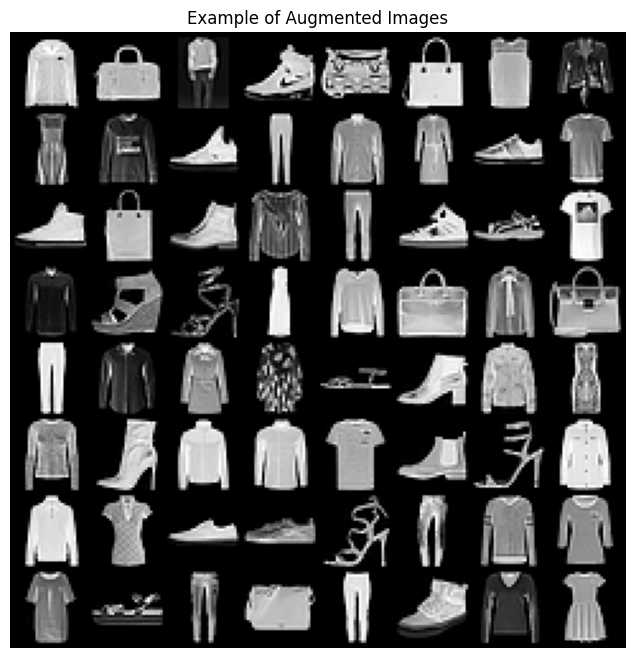

In [36]:
# Visualization of a batch of augmented images
dataiter = iter(trainloader)
aug_images, aug_labels = next(dataiter)

# The images are on the device (e.g., GPU), move them back to the CPU for display
aug_images = aug_images.cpu()

# Create an image grid
grid_img = vutils.make_grid(aug_images, nrow=8, normalize=True)

# Display the grid of images
plt.figure(figsize=(8, 8))
plt.imshow(grid_img.permute(1, 2, 0).squeeze(), cmap='gray')
plt.title("Example of Augmented Images")
plt.axis("off")
plt.show()


- Sets model to evaluation mode (model.eval()).
- Disables gradient tracking (torch.no_grad()) for efficiency.
- Loops through test data, makes predictions, and counts correct ones.
- Prints final test accuracy to measure model performance.

In [38]:
# Set model to evaluation of the model
model1.eval()

# Initiale metrics
correct = 0
total = 0

with torch.no_grad(): 
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model1(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct/total:.3f}%")

Test Accuracy: 91.640%


**Interpretation of Results**

- Without Augmentation → Test Accuracy: 92.010%
- With Augmentation → Test Accuracy: 91.640%

- Minimal Decrease in Accuracy
 
- The test accuracy slightly dropped (from 92.05% to 91.92%) when using data augmentation. This suggests that augmentation didn't significantly improve generalization for this specific dataset and model.

- Since the accuracy difference is small, augmentation isn't hurting performance, but it isn't significantly helping either.